Signal Yield: 14091.75 ± 210.84
Background Yield: 14.34 ± 13.45
ID efficiency : 0.7774 ± 0.0112
Background Slope: -0.00 ± 0.01
Chi-squared: 107.88
Degrees of Freedom: 113
Chi-squared per dof: 0.95


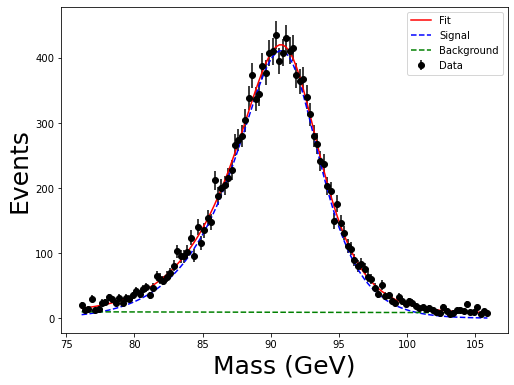

error value saved to eN_2Iee1.txt
value saved to N_2Iee1.txt


In [6]:
###best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_EE_hist1;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 7.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"ID efficiency : 0.7774 ± 0.0112")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")



# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')

plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_2Iee1.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_2Iee1.txt")
with open("N_2Iee1.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_2Iee1.txt")

Signal Yield: 12274.78 ± 177.34
Background Yield: 40.38 ± 29.05
Background Slope: -0.02 ± 0.01
Chi-squared: 121.36
Degrees of Freedom: 113
Chi-squared per dof: 1.07


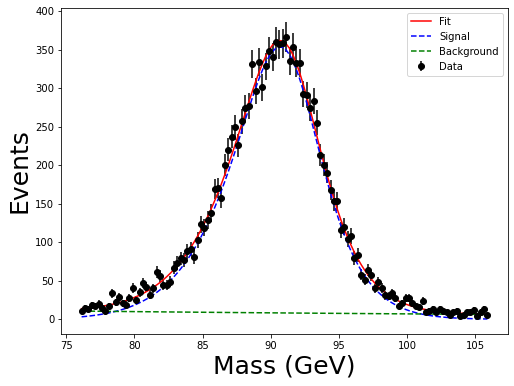

error value saved to eN_2Iee2.txt
value saved to N_2Iee2.txt


In [7]:
###best and final 2 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_EE_hist2;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 10.5, 94, 7.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_2Iee2.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_2Iee2.txt")
with open("N_2Iee2.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_2Iee2.txt")

Signal Yield: 10169.65 ± 154.14
Background Yield: 43.03 ± 23.65
Background Slope: -0.02 ± 0.01
Chi-squared: 135.62
Degrees of Freedom: 113
Chi-squared per dof: 1.20


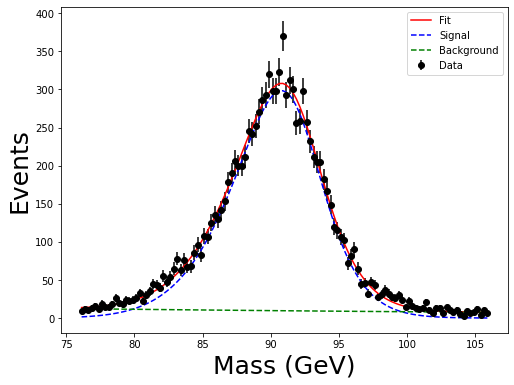

error value saved to eN_2Iee3.txt
value saved to N_2Iee3.txt


In [8]:
###best and final 3 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_EE_hist3;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_2Iee3.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_2Iee3.txt")
with open("N_2Iee3.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_2Iee3.txt")

Signal Yield: 4057.50 ± 163.75
Background Yield: 42.57 ± 37.08
Background Slope: -0.02 ± 0.01
Chi-squared: 102.28
Degrees of Freedom: 113
Chi-squared per dof: 0.91


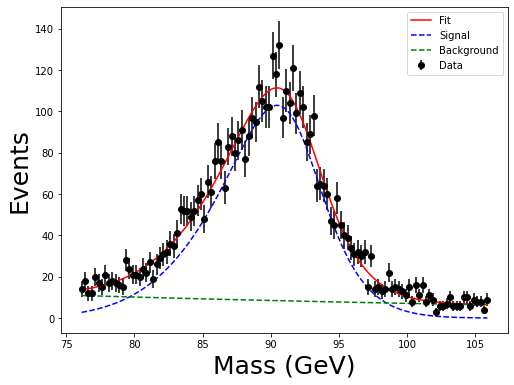

error value saved to eN_1Iee1.txt
value saved to N_1Iee1.txt


In [9]:
###best and final 4 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_EE_hist1;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 10.5, 94, 12.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_1Iee1.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_1Iee1.txt")
with open("N_1Iee1.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_1Iee1.txt")

Signal Yield: 3314.33 ± 129.26
Background Yield: 85.09 ± 63.97
Background Slope: -0.03 ± 0.01
Chi-squared: 140.00
Degrees of Freedom: 113
Chi-squared per dof: 1.24


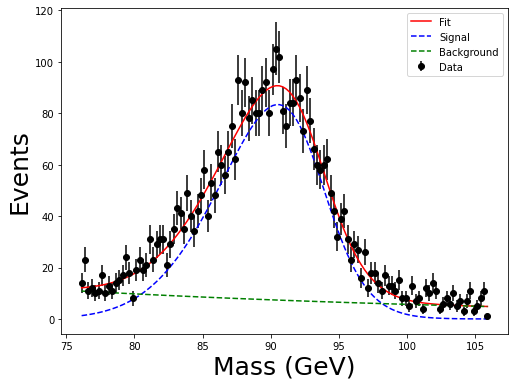

error value saved to eN_1Iee2.txt
value saved to N_1Iee2.txt


In [10]:
###best and final 5 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_EE_hist2;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_1Iee2.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_1Iee2.txt")
with open("N_1Iee2.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_1Iee2.txt")

Signal Yield: 2617.24 ± 153.14
Background Yield: 170.06 ± 135.54
Background Slope: -0.04 ± 0.01
Chi-squared: 114.01
Degrees of Freedom: 113
Chi-squared per dof: 1.01


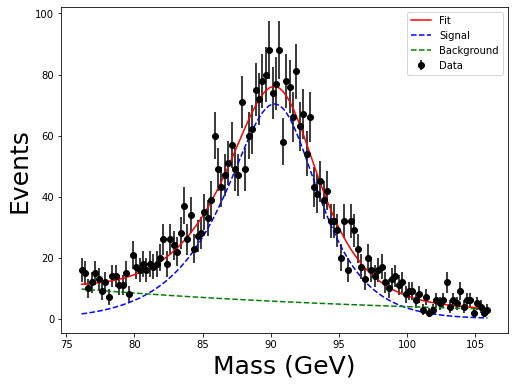

error value saved to eN_1Iee3.txt
value saved to N_1Iee3.txt


In [11]:
###best and final 6 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_EE_hist3;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 7.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")


# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_1Iee3.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_1Iee3.txt")
with open("N_1Iee3.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_1Iee3.txt")

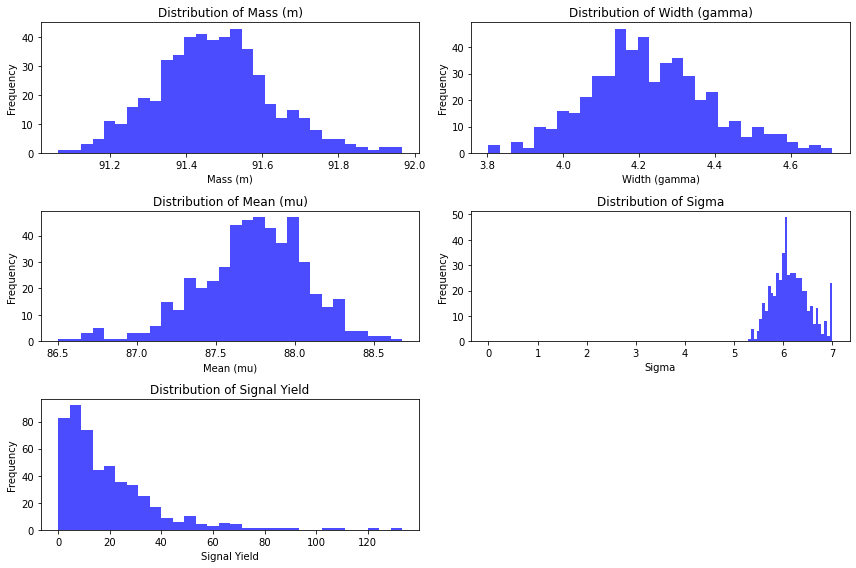

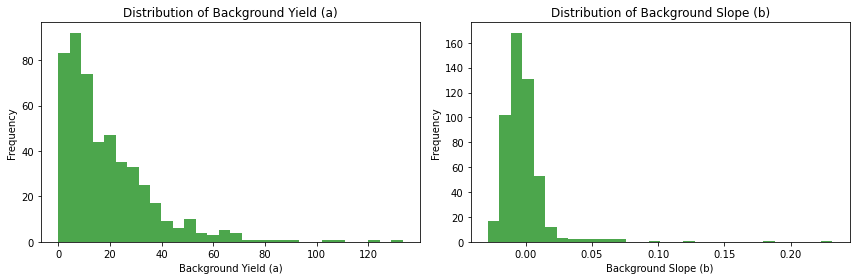

In [7]:
### best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_EE_hist1;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield
    background = exponential_background(x, a, b)
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)
signal_fraction_guess = 0.95
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters
initial_params = [
    91.1876, 2.4952, 91.0, 2.0, 1.0, -0.01, signal_yield_guess
]

# Bounds for Parameters
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],
    [94, 5.5, 94, 7.0, np.inf, 1.0, total_yield * 1.5]
)

# Number of bootstrap iterations
n_bootstrap = 500

# Arrays to store fitted parameters
signal_params = []  # For signal-related parameters (m, gamma, mu, sigma, sig_yield)
background_params = []  # For background-related parameters (a, b)

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Generate a resampled histogram with replacement
    resampled_y_data = np.random.poisson(y_data)  # Resample assuming Poisson statistics

    try:
        # Fit the resampled data
        popt_resampled, _ = curve_fit(
            fit_function, x_data, resampled_y_data, p0=initial_params, sigma=y_errors, bounds=bounds
        )
        
        # Store signal parameters
        signal_params.append(popt_resampled[:5])  # m, gamma, mu, sigma, sig_yield
        
        # Store background parameters
        background_params.append(popt_resampled[4:6])  # a, b
    
    except RuntimeError:
        # Skip fits that fail to converge
        continue

# Convert collected parameters to numpy arrays for easier indexing
signal_params = np.array(signal_params)
background_params = np.array(background_params)

# Plotting signal parameter distributions
plt.figure(figsize=(12, 8))
signal_labels = ["Mass (m)", "Width (gamma)", "Mean (mu)", "Sigma", "Signal Yield"]
for i, param in enumerate(signal_labels):
    plt.subplot(3, 2, i + 1)
    plt.hist(signal_params[:, i], bins=30, color='blue', alpha=0.7)
    if param == "Sigma":
        plt.hist(signal_params[:, i],range=(0,5), bins=100, color='blue', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

# Plotting background parameter distributions
plt.figure(figsize=(12, 4))
background_labels = ["Background Yield (a)", "Background Slope (b)"]
for i, param in enumerate(background_labels):
    plt.subplot(1, 2, i + 1)
    plt.hist(background_params[:, i], bins=30, color='green', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()


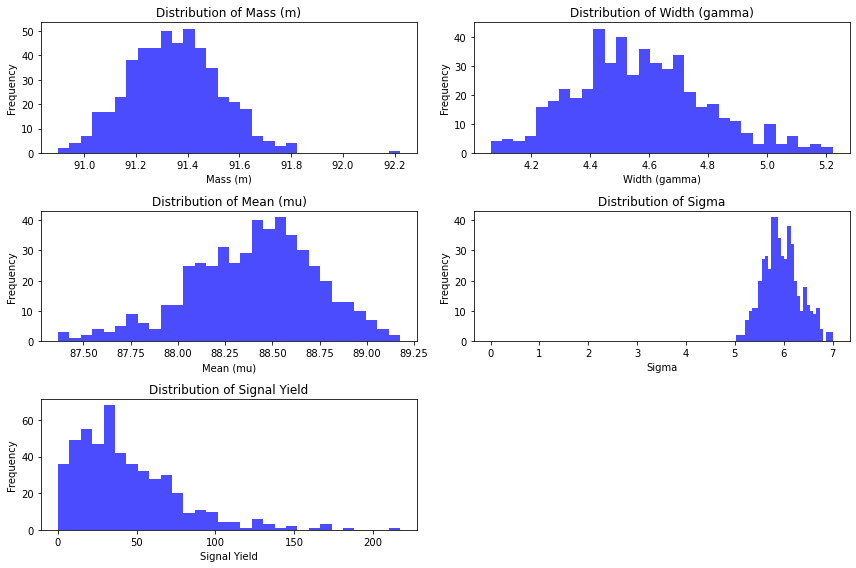

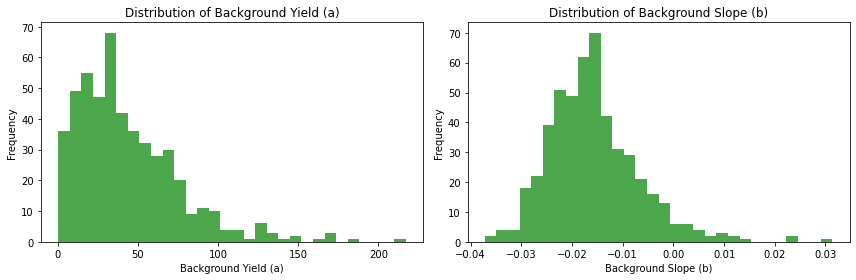

In [3]:
### best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_EE_hist2;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield
    background = exponential_background(x, a, b)
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)
signal_fraction_guess = 0.95
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters
initial_params = [
    91.1876, 2.4952, 91.0, 2.0, 1.0, -0.01, signal_yield_guess
]

# Bounds for Parameters
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],
    [94, 5.5, 94, 7.0, np.inf, 1.0, total_yield * 1.5]
)

# Number of bootstrap iterations
n_bootstrap = 500

# Arrays to store fitted parameters
signal_params = []  # For signal-related parameters (m, gamma, mu, sigma, sig_yield)
background_params = []  # For background-related parameters (a, b)

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Generate a resampled histogram with replacement
    resampled_y_data = np.random.poisson(y_data)  # Resample assuming Poisson statistics

    try:
        # Fit the resampled data
        popt_resampled, _ = curve_fit(
            fit_function, x_data, resampled_y_data, p0=initial_params, sigma=y_errors, bounds=bounds
        )
        
        # Store signal parameters
        signal_params.append(popt_resampled[:5])  # m, gamma, mu, sigma, sig_yield
        
        # Store background parameters
        background_params.append(popt_resampled[4:6])  # a, b
    
    except RuntimeError:
        # Skip fits that fail to converge
        continue

# Convert collected parameters to numpy arrays for easier indexing
signal_params = np.array(signal_params)
background_params = np.array(background_params)

# Plotting signal parameter distributions
plt.figure(figsize=(12, 8))
signal_labels = ["Mass (m)", "Width (gamma)", "Mean (mu)", "Sigma", "Signal Yield"]
for i, param in enumerate(signal_labels):
    plt.subplot(3, 2, i + 1)
    plt.hist(signal_params[:, i], bins=30, color='blue', alpha=0.7)
    if param == "Sigma":
        plt.hist(signal_params[:, i],range=(0,5), bins=100, color='blue', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

# Plotting background parameter distributions
plt.figure(figsize=(12, 4))
background_labels = ["Background Yield (a)", "Background Slope (b)"]
for i, param in enumerate(background_labels):
    plt.subplot(1, 2, i + 1)
    plt.hist(background_params[:, i], bins=30, color='green', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()


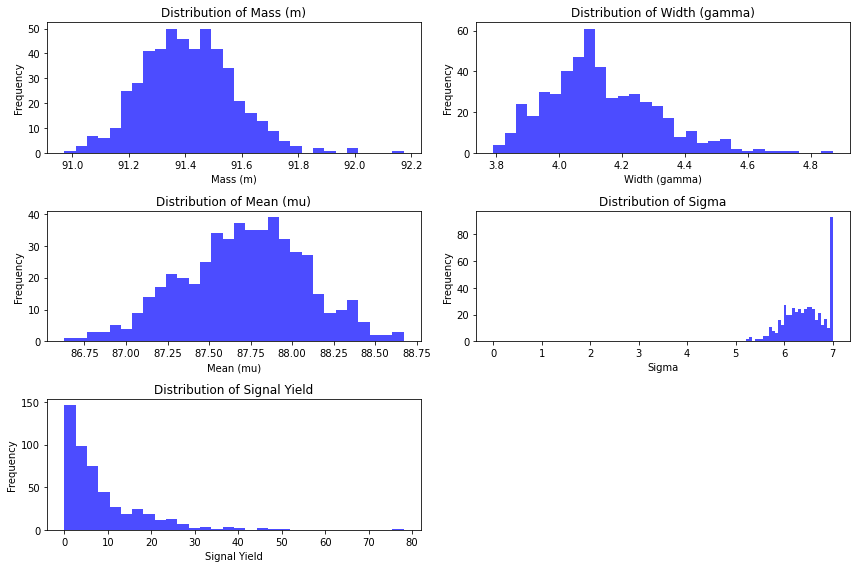

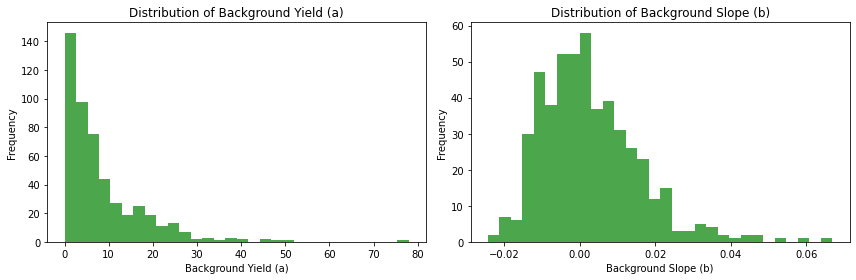

In [19]:
### best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_EE_hist3;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield
    background = exponential_background(x, a, b)
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)
signal_fraction_guess = 0.95
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters
initial_params = [
    91.1876, 2.4952, 91.0, 2.0, 1.0, -0.01, signal_yield_guess
]

# Bounds for Parameters
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],
    [94, 5.5, 94, 7.0, np.inf, 1.0, total_yield * 1.5]
)

# Number of bootstrap iterations
n_bootstrap = 500

# Arrays to store fitted parameters
signal_params = []  # For signal-related parameters (m, gamma, mu, sigma, sig_yield)
background_params = []  # For background-related parameters (a, b)

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Generate a resampled histogram with replacement
    resampled_y_data = np.random.poisson(y_data)  # Resample assuming Poisson statistics

    try:
        # Fit the resampled data
        popt_resampled, _ = curve_fit(
            fit_function, x_data, resampled_y_data, p0=initial_params, sigma=y_errors, bounds=bounds
        )
        
        # Store signal parameters
        signal_params.append(popt_resampled[:5])  # m, gamma, mu, sigma, sig_yield
        
        # Store background parameters
        background_params.append(popt_resampled[4:6])  # a, b
    
    except RuntimeError:
        # Skip fits that fail to converge
        continue

# Convert collected parameters to numpy arrays for easier indexing
signal_params = np.array(signal_params)
background_params = np.array(background_params)

# Plotting signal parameter distributions
plt.figure(figsize=(12, 8))
signal_labels = ["Mass (m)", "Width (gamma)", "Mean (mu)", "Sigma", "Signal Yield"]
for i, param in enumerate(signal_labels):
    plt.subplot(3, 2, i + 1)
    plt.hist(signal_params[:, i], bins=30, color='blue', alpha=0.7)
    if param == "Sigma":
        plt.hist(signal_params[:, i],range=(0,5), bins=100, color='blue', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

# Plotting background parameter distributions
plt.figure(figsize=(12, 4))
background_labels = ["Background Yield (a)", "Background Slope (b)"]
for i, param in enumerate(background_labels):
    plt.subplot(1, 2, i + 1)
    plt.hist(background_params[:, i], bins=30, color='green', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()


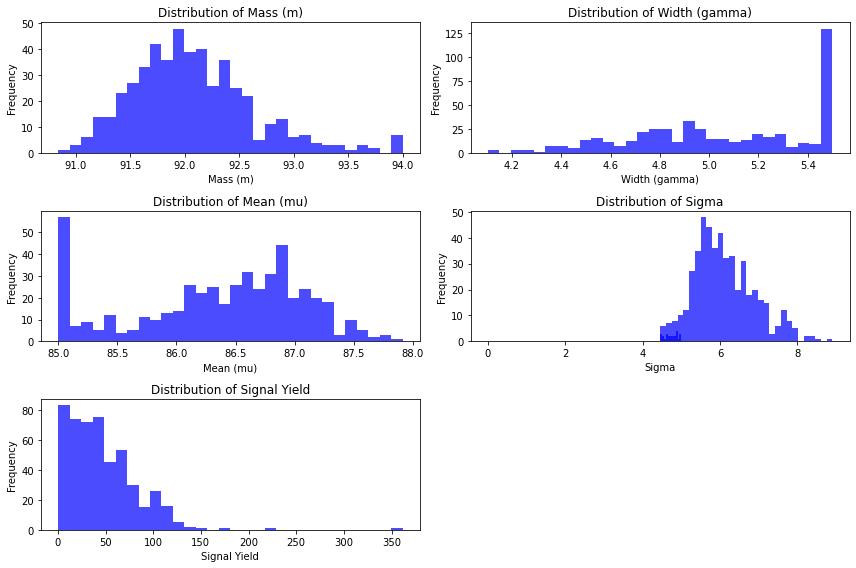

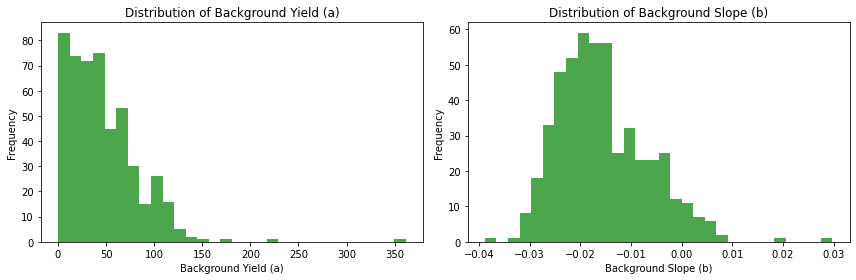

In [22]:
### best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_EE_hist1;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield
    background = exponential_background(x, a, b)
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)
signal_fraction_guess = 0.95
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters
initial_params = [
    91.1876, 2.4952, 91.0, 2.0, 1.0, -0.01, signal_yield_guess
]

# Bounds for Parameters
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],
    [94, 5.5, 94, 12.0, np.inf, 1.0, total_yield * 1.5]
)

# Number of bootstrap iterations
n_bootstrap = 500

# Arrays to store fitted parameters
signal_params = []  # For signal-related parameters (m, gamma, mu, sigma, sig_yield)
background_params = []  # For background-related parameters (a, b)

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Generate a resampled histogram with replacement
    resampled_y_data = np.random.poisson(y_data)  # Resample assuming Poisson statistics

    try:
        # Fit the resampled data
        popt_resampled, _ = curve_fit(
            fit_function, x_data, resampled_y_data, p0=initial_params, sigma=y_errors, bounds=bounds
        )
        
        # Store signal parameters
        signal_params.append(popt_resampled[:5])  # m, gamma, mu, sigma, sig_yield
        
        # Store background parameters
        background_params.append(popt_resampled[4:6])  # a, b
    
    except RuntimeError:
        # Skip fits that fail to converge
        continue

# Convert collected parameters to numpy arrays for easier indexing
signal_params = np.array(signal_params)
background_params = np.array(background_params)

# Plotting signal parameter distributions
plt.figure(figsize=(12, 8))
signal_labels = ["Mass (m)", "Width (gamma)", "Mean (mu)", "Sigma", "Signal Yield"]
for i, param in enumerate(signal_labels):
    plt.subplot(3, 2, i + 1)
    plt.hist(signal_params[:, i], bins=30, color='blue', alpha=0.7)
    if param == "Sigma":
        plt.hist(signal_params[:, i],range=(0,5), bins=100, color='blue', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

# Plotting background parameter distributions
plt.figure(figsize=(12, 4))
background_labels = ["Background Yield (a)", "Background Slope (b)"]
for i, param in enumerate(background_labels):
    plt.subplot(1, 2, i + 1)
    plt.hist(background_params[:, i], bins=30, color='green', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()


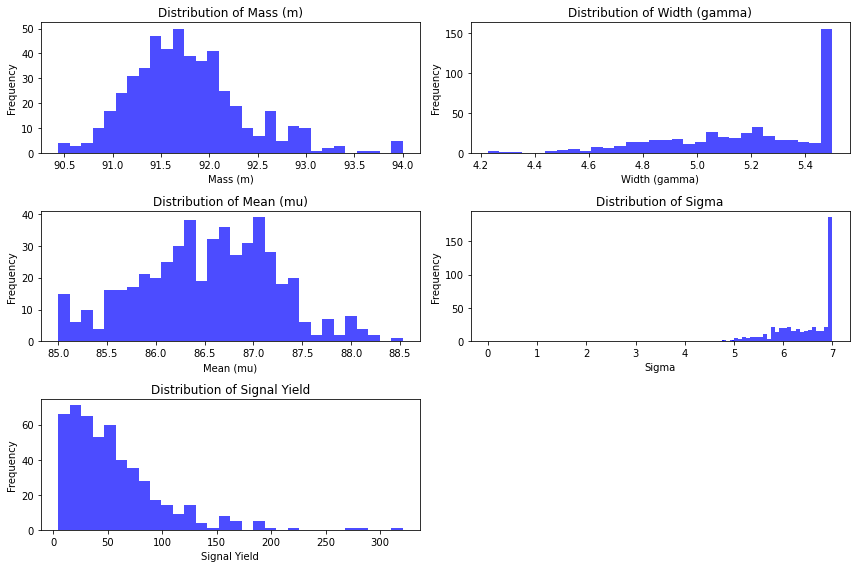

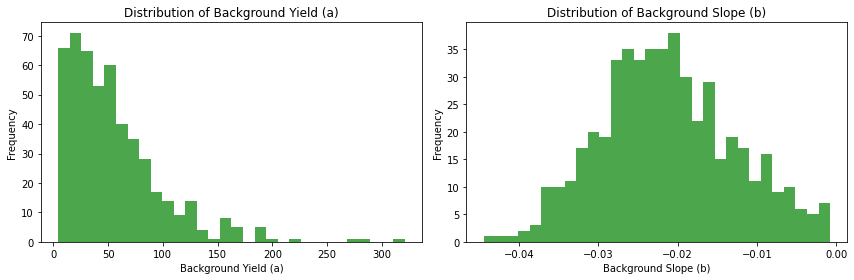

In [24]:
### best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_EE_hist2;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield
    background = exponential_background(x, a, b)
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)
signal_fraction_guess = 0.95
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters
initial_params = [
    91.1876, 2.4952, 91.0, 2.0, 1.0, -0.01, signal_yield_guess
]

# Bounds for Parameters
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],
    [94, 5.5, 94, 7.0, np.inf, 1.0, total_yield * 1.5]
)

# Number of bootstrap iterations
n_bootstrap = 500

# Arrays to store fitted parameters
signal_params = []  # For signal-related parameters (m, gamma, mu, sigma, sig_yield)
background_params = []  # For background-related parameters (a, b)

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Generate a resampled histogram with replacement
    resampled_y_data = np.random.poisson(y_data)  # Resample assuming Poisson statistics

    try:
        # Fit the resampled data
        popt_resampled, _ = curve_fit(
            fit_function, x_data, resampled_y_data, p0=initial_params, sigma=y_errors, bounds=bounds
        )
        
        # Store signal parameters
        signal_params.append(popt_resampled[:5])  # m, gamma, mu, sigma, sig_yield
        
        # Store background parameters
        background_params.append(popt_resampled[4:6])  # a, b
    
    except RuntimeError:
        # Skip fits that fail to converge
        continue

# Convert collected parameters to numpy arrays for easier indexing
signal_params = np.array(signal_params)
background_params = np.array(background_params)

# Plotting signal parameter distributions
plt.figure(figsize=(12, 8))
signal_labels = ["Mass (m)", "Width (gamma)", "Mean (mu)", "Sigma", "Signal Yield"]
for i, param in enumerate(signal_labels):
    plt.subplot(3, 2, i + 1)
    plt.hist(signal_params[:, i], bins=30, color='blue', alpha=0.7)
    if param == "Sigma":
        plt.hist(signal_params[:, i],range=(0,5), bins=100, color='blue', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

# Plotting background parameter distributions
plt.figure(figsize=(12, 4))
background_labels = ["Background Yield (a)", "Background Slope (b)"]
for i, param in enumerate(background_labels):
    plt.subplot(1, 2, i + 1)
    plt.hist(background_params[:, i], bins=30, color='green', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()


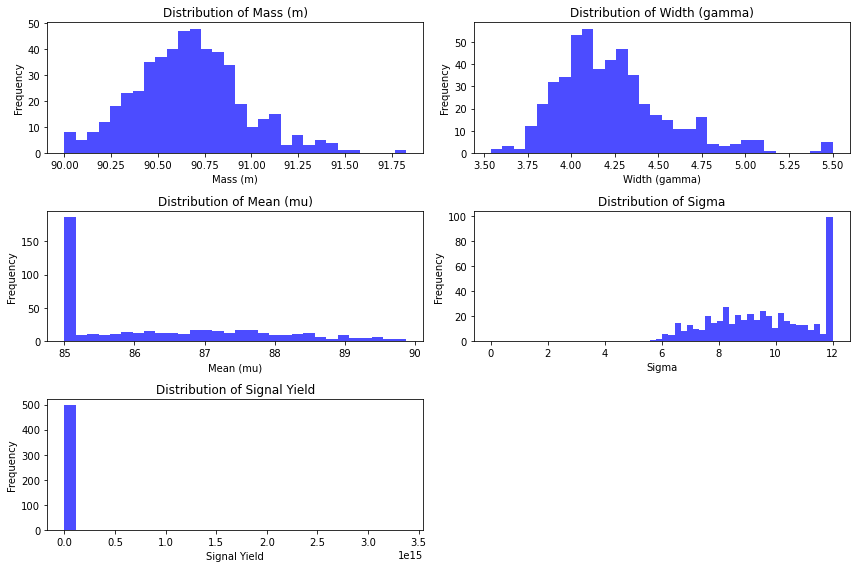

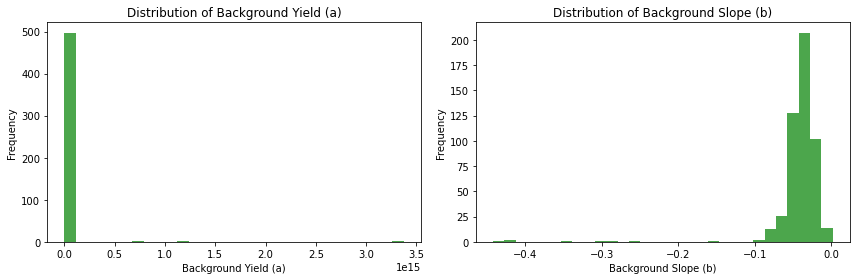

In [27]:
### best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionEE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_EE_hist3;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield
    background = exponential_background(x, a, b)
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)
signal_fraction_guess = 0.95
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters
initial_params = [
    91.1876, 2.4952, 91.0, 2.0, 1.0, -0.01, signal_yield_guess
]

# Bounds for Parameters
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],
    [94, 5.5, 94, 12.0, np.inf, 1.0, total_yield * 1.5]
)

# Number of bootstrap iterations
n_bootstrap = 500

# Arrays to store fitted parameters
signal_params = []  # For signal-related parameters (m, gamma, mu, sigma, sig_yield)
background_params = []  # For background-related parameters (a, b)

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Generate a resampled histogram with replacement
    resampled_y_data = np.random.poisson(y_data)  # Resample assuming Poisson statistics

    try:
        # Fit the resampled data
        popt_resampled, _ = curve_fit(
            fit_function, x_data, resampled_y_data, p0=initial_params, sigma=y_errors, bounds=bounds
        )
        
        # Store signal parameters
        signal_params.append(popt_resampled[:5])  # m, gamma, mu, sigma, sig_yield
        
        # Store background parameters
        background_params.append(popt_resampled[4:6])  # a, b
    
    except RuntimeError:
        # Skip fits that fail to converge
        continue

# Convert collected parameters to numpy arrays for easier indexing
signal_params = np.array(signal_params)
background_params = np.array(background_params)

# Plotting signal parameter distributions
plt.figure(figsize=(12, 8))
signal_labels = ["Mass (m)", "Width (gamma)", "Mean (mu)", "Sigma", "Signal Yield"]
for i, param in enumerate(signal_labels):
    plt.subplot(3, 2, i + 1)
    plt.hist(signal_params[:, i], bins=30, color='blue', alpha=0.7)
    if param == "Sigma":
        plt.hist(signal_params[:, i],range=(0,5), bins=100, color='blue', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

# Plotting background parameter distributions
plt.figure(figsize=(12, 4))
background_labels = ["Background Yield (a)", "Background Slope (b)"]
for i, param in enumerate(background_labels):
    plt.subplot(1, 2, i + 1)
    plt.hist(background_params[:, i], bins=30, color='green', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()
